# Examining the Curated Data

This file was provided by the Professor. I have added modified it slightly to print more information such as about the labels and their split.

## Setup

In [40]:
# Import Libraries 

import os                                           # Operating System for local file management (not needed for Google Colab)
import numpy as np                                  # Numpy for numerical operations
import matplotlib.pyplot as plt                     # Matplotlib for plotting  


## Load and examine one file

In [36]:
# Get the current working directory
# TODO change this to mount Google Drive if using Google Colab

data_directory = os.path.join(os.getcwd(), "curated_data")

In [63]:
# load one file to examine its content

file_name = '8000.npy'
file1 = np.load(os.path.join(data_directory, file_name), allow_pickle=True)

print(file1)

[array([[-50.64062119,  25.32031059,  35.65999985],
        [-50.64062119,  25.32031059,  71.31999969],
        [-49.7778511 ,  18.76693153,  35.65999985],
        ...,
        [ 50.42248917,  29.73369598,  36.65999985],
        [ 51.22733307,  23.62030983,  35.65999985],
        [ 51.22733307,  23.62030983,  36.65999985]])
 array([[-50.64062119, -43.54262106,   4.09803228],
        [-50.64062119, -74.42508683, -13.73196764],
        [-49.7778511 , -40.26593153,  -1.57736046],
        ...,
        [ 50.42248917, -46.61533916,   7.42013615],
        [ 51.22733307, -42.69262068,   2.62578843],
        [ 51.22733307, -43.55864609,   2.12578843]]) 1]


In [64]:
part1, part2, label = file1
print(part1)
print(part2)
print(label)

[[-50.64062119  25.32031059  35.65999985]
 [-50.64062119  25.32031059  71.31999969]
 [-49.7778511   18.76693153  35.65999985]
 ...
 [ 50.42248917  29.73369598  36.65999985]
 [ 51.22733307  23.62030983  35.65999985]
 [ 51.22733307  23.62030983  36.65999985]]
[[-50.64062119 -43.54262106   4.09803228]
 [-50.64062119 -74.42508683 -13.73196764]
 [-49.7778511  -40.26593153  -1.57736046]
 ...
 [ 50.42248917 -46.61533916   7.42013615]
 [ 51.22733307 -42.69262068   2.62578843]
 [ 51.22733307 -43.55864609   2.12578843]]
1


## Vizualize the Data

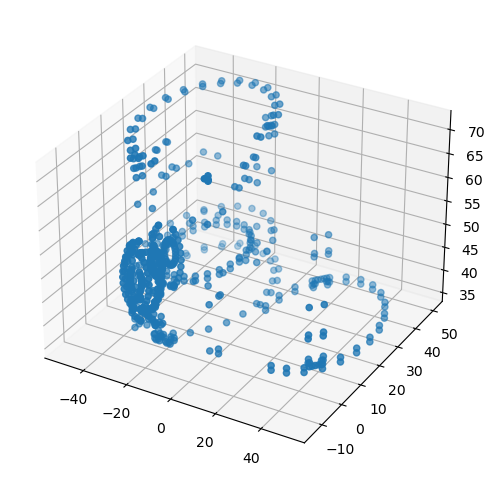

In [65]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(part1[:, 0], part1[:, 1], part1[:, 2])
plt.show()

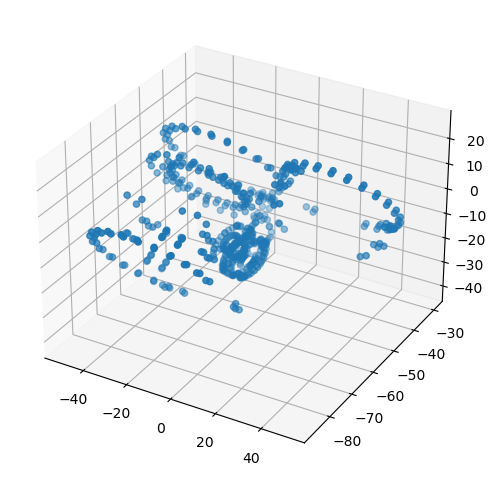

In [66]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(part2[:, 0], part2[:, 1], part2[:, 2])
plt.show()

## Voxelize the Data

In [67]:
# function to create a 32 x 32 x 32 voxelization from point cloud

def voxelize(pc):
    #normalize point cloud data
    point_cloud = (pc - pc.min(axis=0))/(pc.max(axis=0) - pc.min(axis=0))

    #create empty voxel data
    voxel_size = 32
    voxelized = np.zeros((voxel_size, voxel_size, voxel_size))

    #scale point cloud data to fix voxel data sizee
    point_cloud = ((voxel_size-1)*point_cloud).astype(int)

    #set voxels corresponding to point cloud
    voxelized[point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2]] = 1

    return voxelized

In [68]:
v1 = voxelize(part1)                                # Voxelization of part1

v1.shape                                            # check that size is as expected 

(32, 32, 32)

## Visualize voxel data

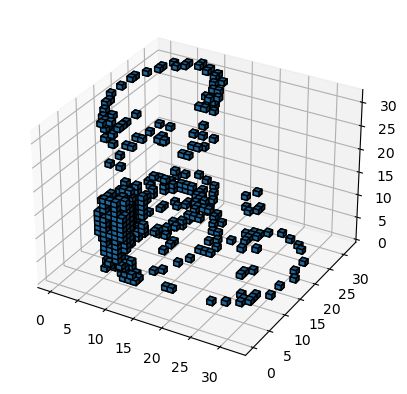

In [69]:
fig = plt.figure()                              # Create a new figure
ax = fig.add_subplot(projection='3d')           # Add 3D plot to the figure
ax.voxels(v1, edgecolor="k")                    # Plot the voxelized data

plt.show()                                      # Show the plot

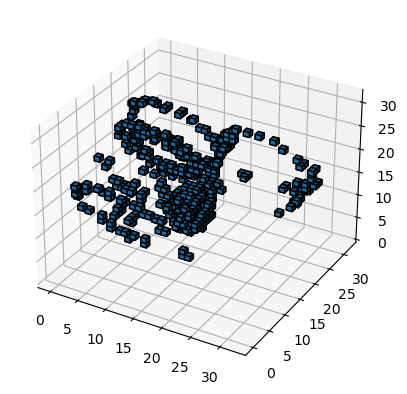

In [70]:
v2 = voxelize(part2)

fig = plt.figure()                              # Create a new figure
ax = fig.add_subplot(projection='3d')           # Add 3D plot to the figure
ax.voxels(v2, edgecolor="k")                    # Plot the voxelized data

plt.show()                                      # Show the plot

## Number of instances for each label
Modified code

In [62]:
# Initialize counters for labels 0 and 1
count_label_0 = 0
count_label_1 = 0

# Iterate over all .npy files in the directory
for file_name in os.listdir(data_directory):
    if file_name.endswith('.npy'):
        # Load the .npy file
        file_path = os.path.join(data_directory, file_name)
        data = np.load(file_path, allow_pickle=True)
        
        # Extract the label
        _, _, label = data

        # Update the counters based on the label
        if label == 0:
            count_label_0 += 1
        elif label == 1:
            count_label_1 += 1

# Print the counts
print(f"Number of instances with label 0: {count_label_0}")
print(f"Number of instances with label 1: {count_label_1}")

Number of instances with label 0: 15902
Number of instances with label 1: 15982
